In [2]:
import scipy as sp

In [3]:
data = sp.genfromtxt("./BuildingMachineLearningSystemsWithPython"
                     "/ch01/data/web_traffic.tsv", delimiter="\t")\
# split, x : hours, y : hits
x = data[:, 0]
y = data[:, 1]
x1 = x[~sp.isnan(y)]
y1 = y[~sp.isnan(y)]

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
/home/dockeruser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


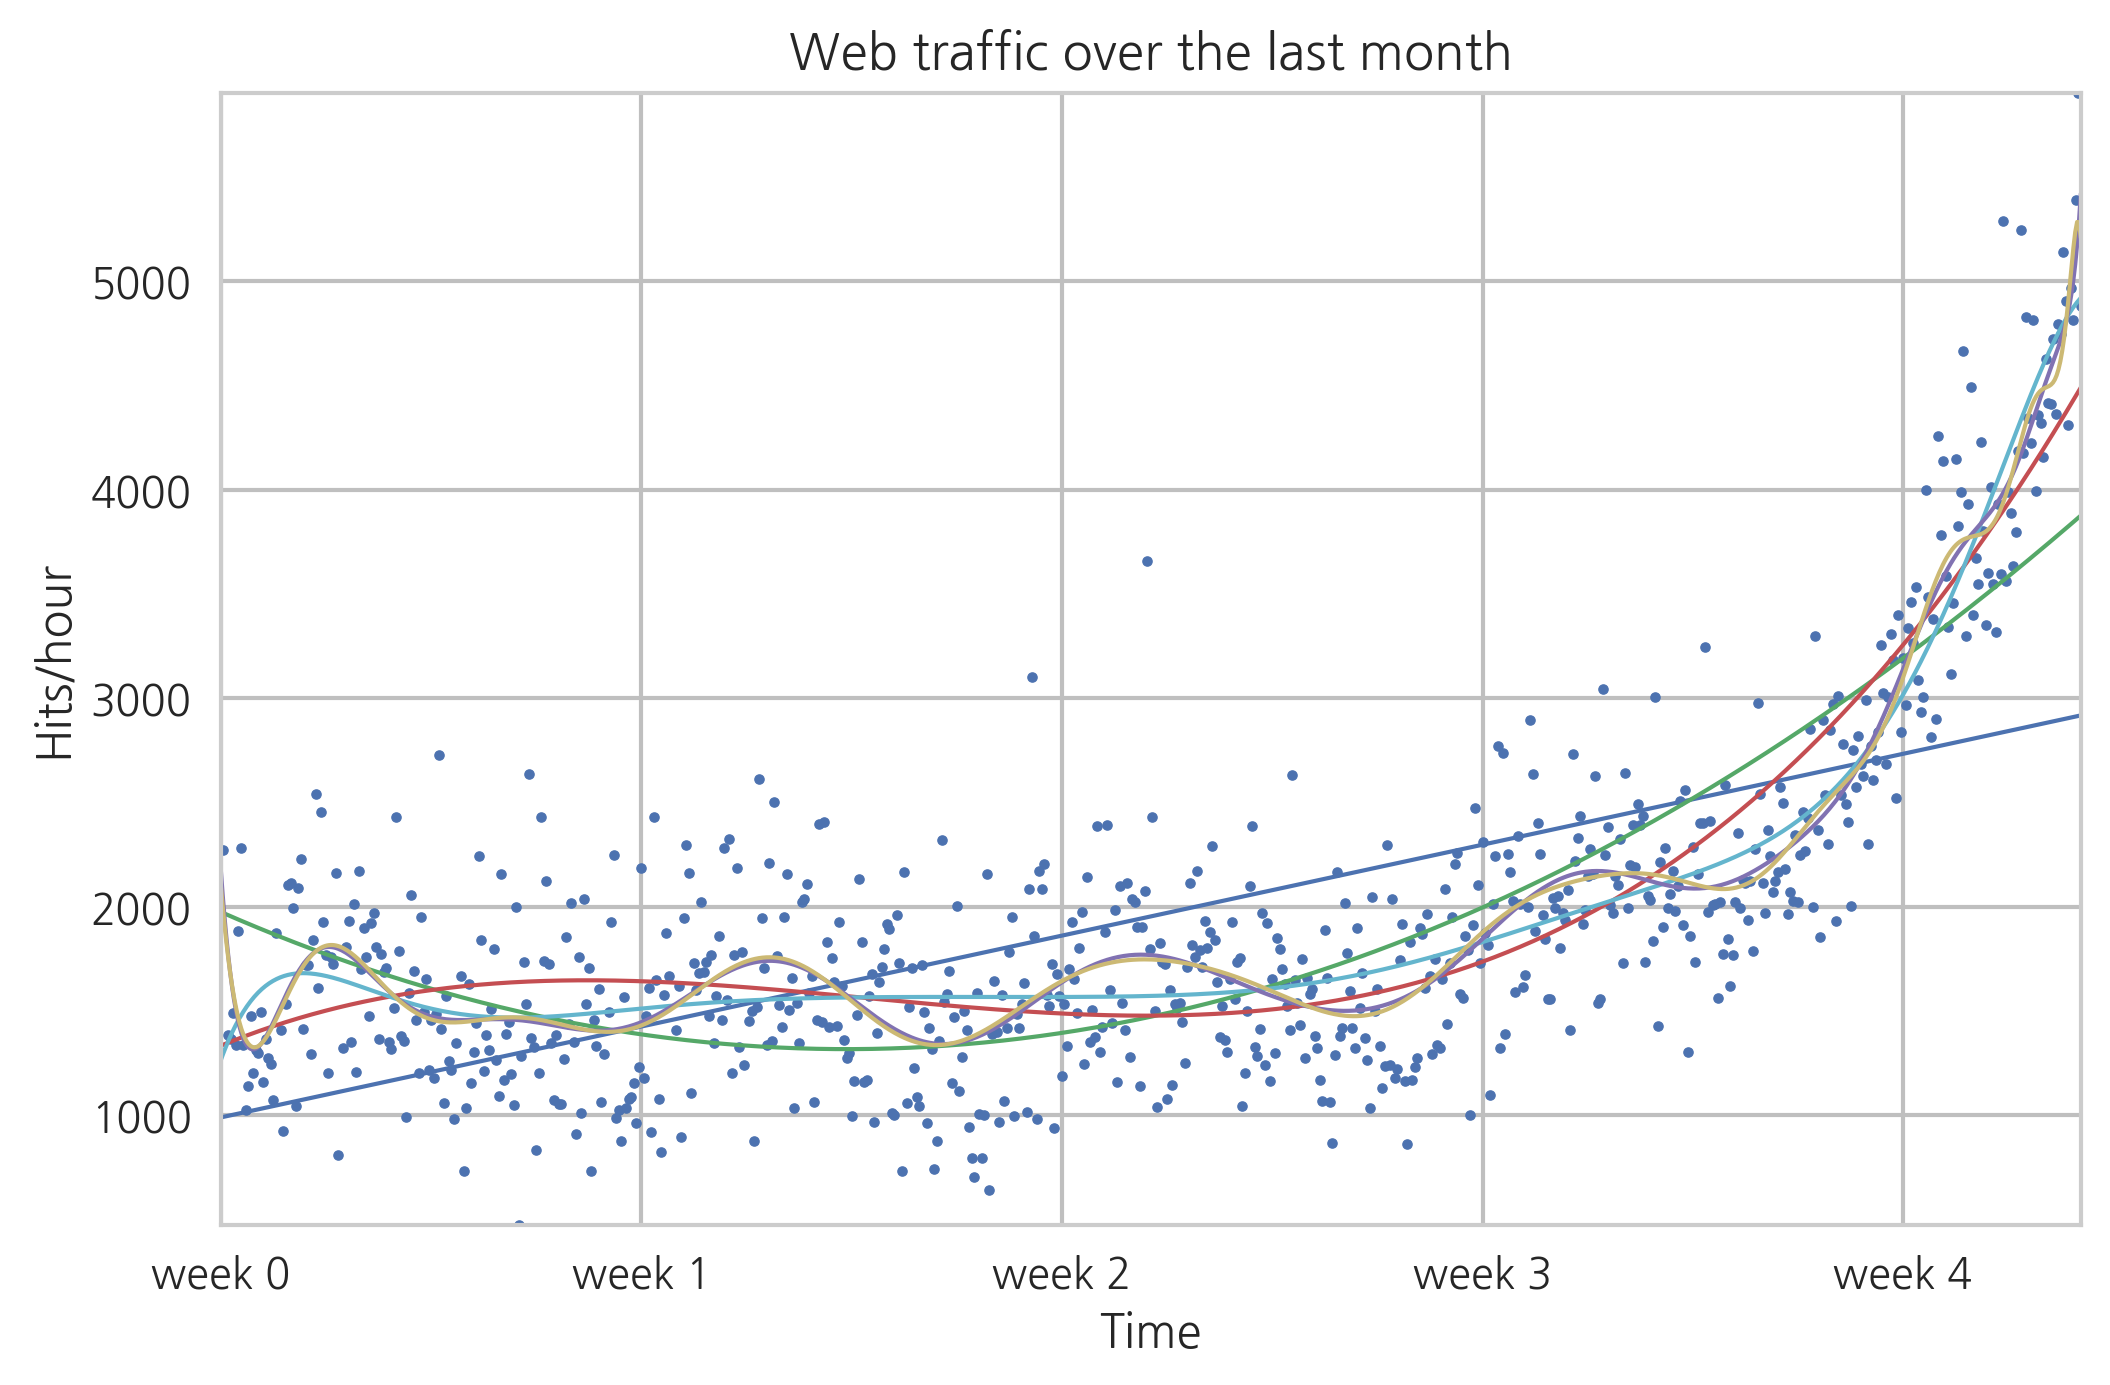

In [11]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)


def get_polyfunc(x, y, n):
    fp = sp.polyfit(x, y, n)
    f = sp.poly1d(fp)
    return f


plt.scatter(x1, y1, s=5)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' % w for w in range(10)])

fx = sp.linspace(0, x[-1], 1000)
nums = [1, 2, 3, 10, 30, 50]
cols = 'bgrcmykw'
e_lst = []
for i, num in enumerate(nums):
    f = get_polyfunc(x1, y1, num)
    e_lst.append(error(f, x1, y1))
    plt.plot(fx, f(fx), linewidth=1, color=cols[i])
    
plt.legend()
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
plt.show()    

- Looking at the polynomial of degree 10 and 53, we see wildly oscillating behavior. It seems that the models are fitted too much to the data. So much that it is now capturing not only the underlying process but also the noise. This is called overfitting. 

> Choices
- Choosing one of the fitted polynomial models
- Switching to another more complex model class. Splines?
- Thinging differently about the data and start again

## Stepping bakc to go forward - another look at  our data

In [8]:
inflection = int(3.5*7*24) # calculate the inflection point
xa = x1[:inflection]
ya = y1[:inflection]
xb = x1[inflection:]
yb = y1[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=132950348.197616


/home/dockeruser/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


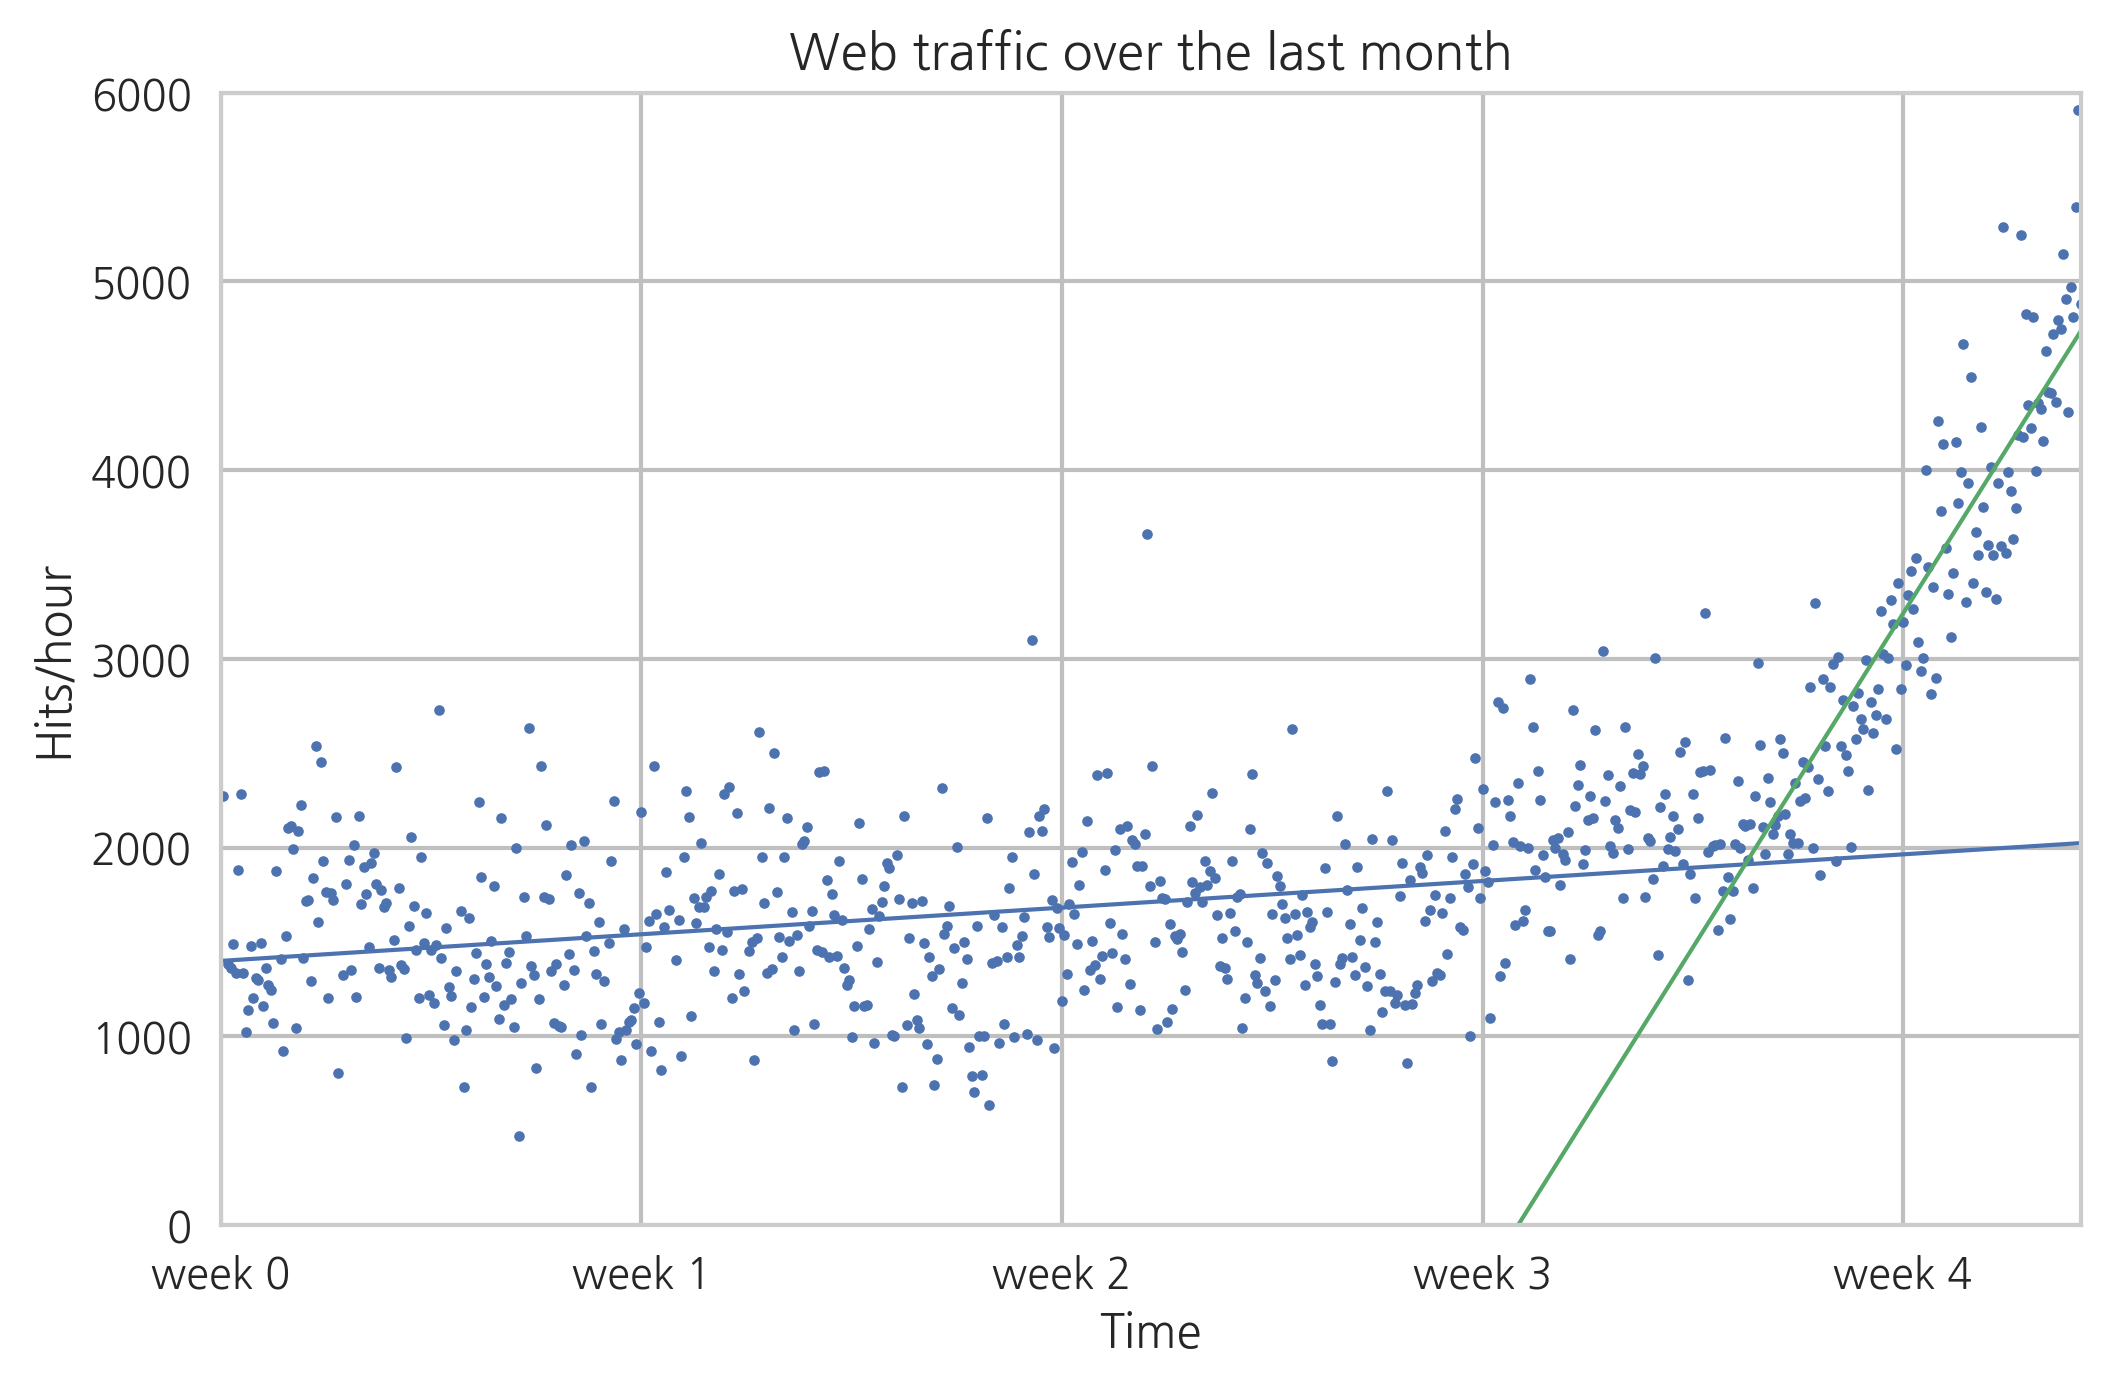

In [10]:
plt.scatter(x1, y1, s=5)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' % w for w in range(10)])

fx = sp.linspace(0, x[-1], 1000)
nums = [1, 2, 3, 10, 30, 53]
cols = 'bgrcmykw'

plt.plot(fx, fa(fx), linewidth=1, color=cols[0])
plt.plot(fx, fb(fx), linewidth=1, color=cols[1])
    
plt.legend()
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
plt.ylim(0, 6000)
plt.show()    

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


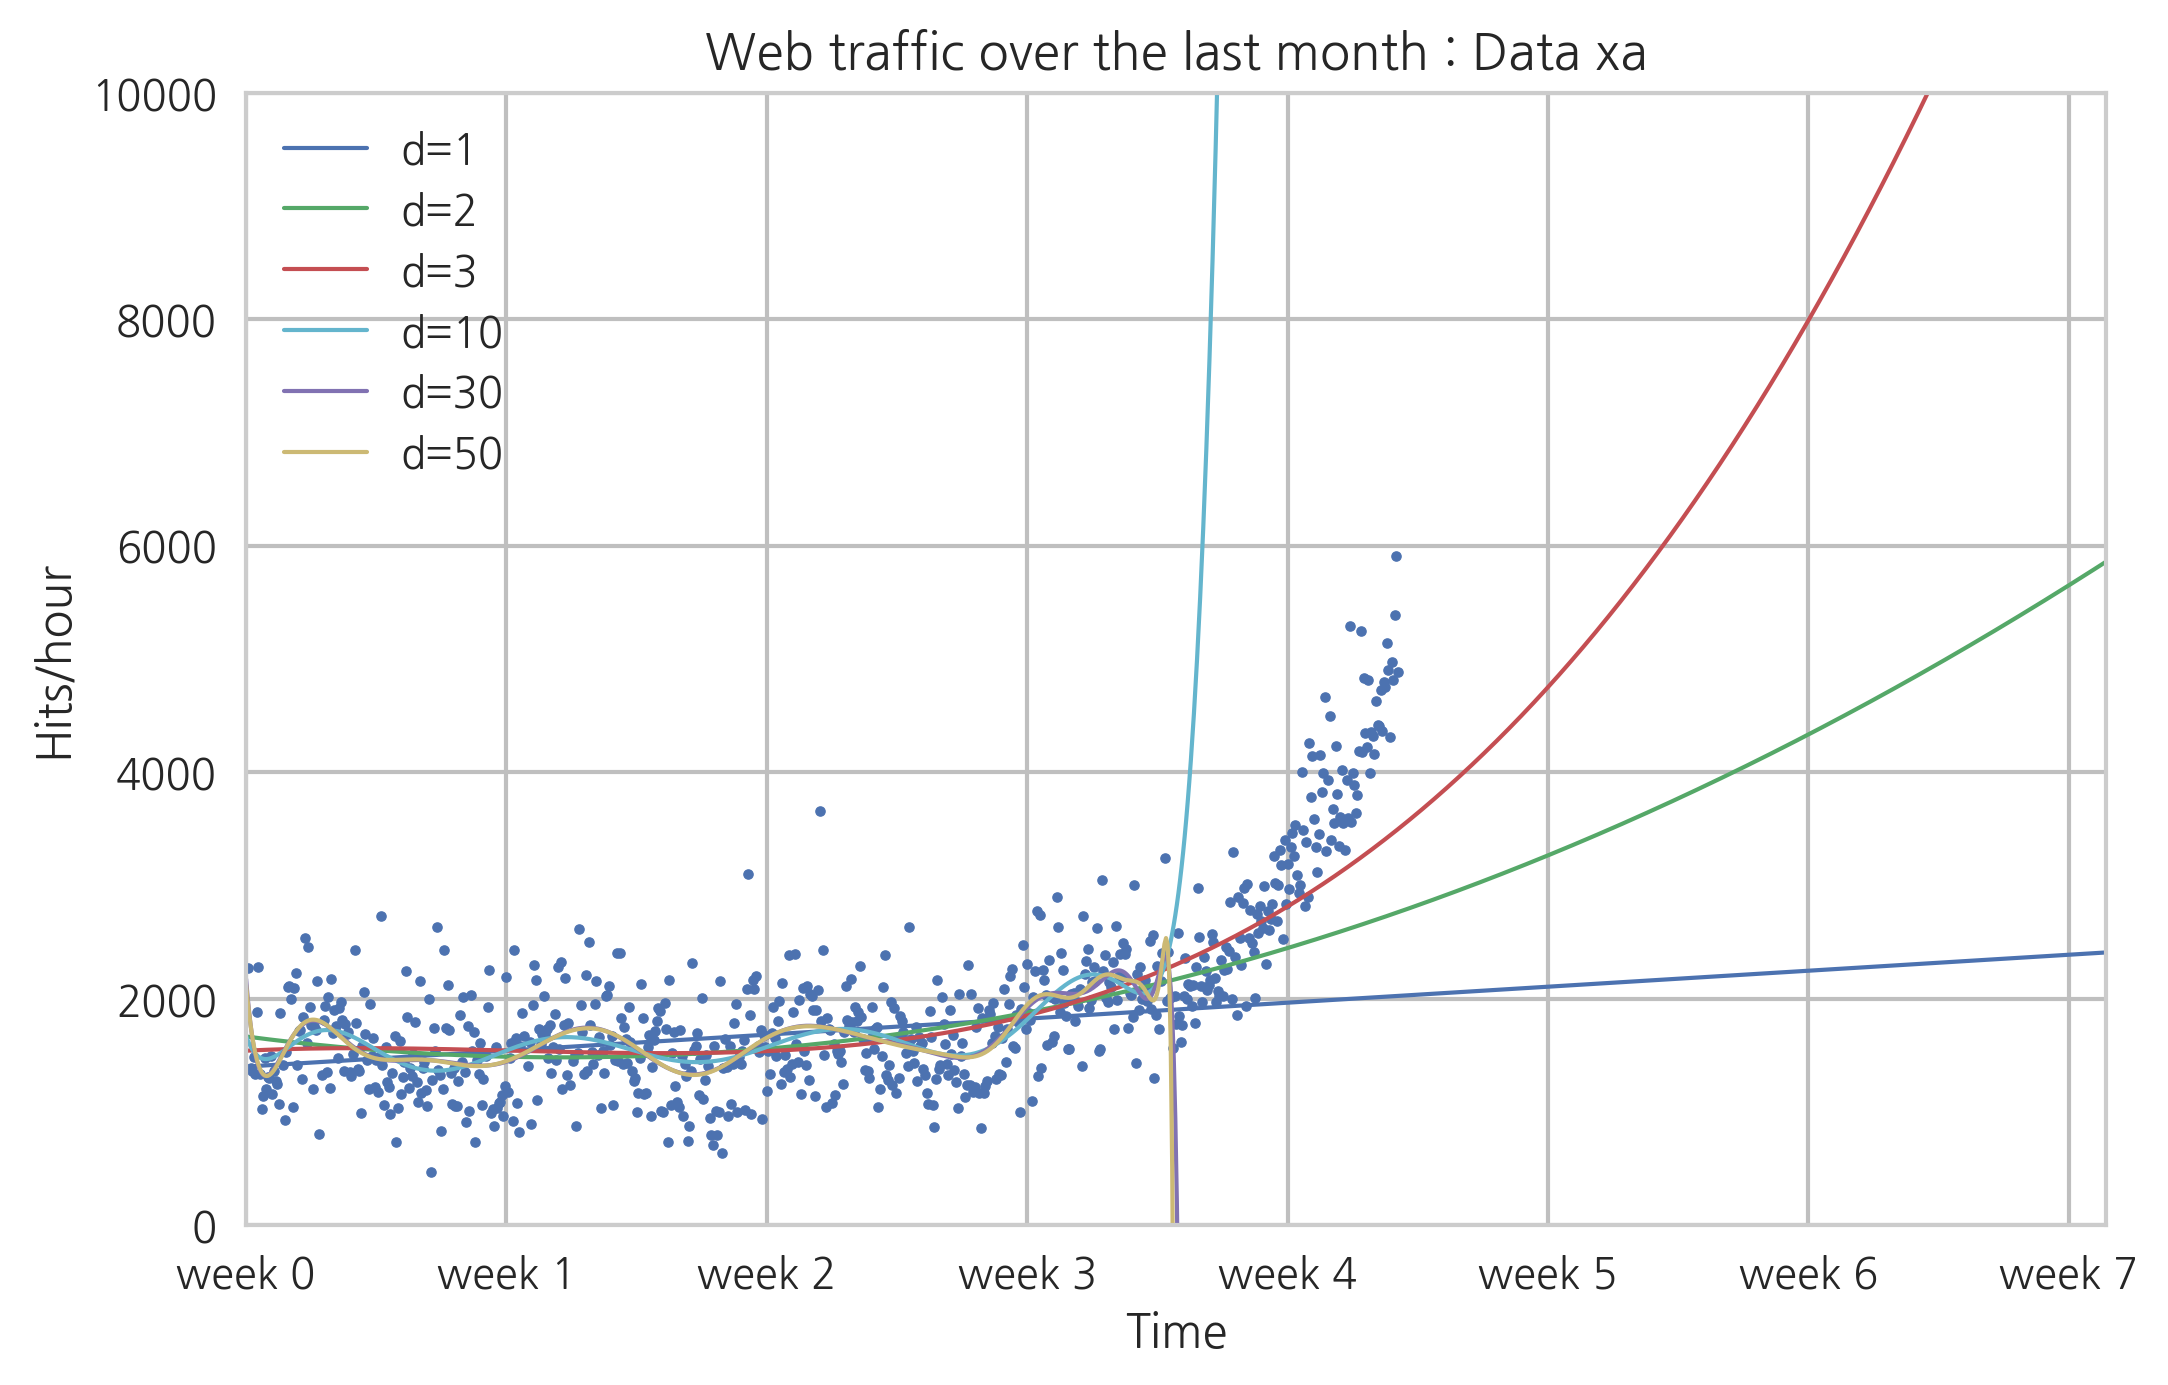

In [20]:
plt.scatter(x1, y1, s=5)
plt.title("Web traffic over the last month : Data xa")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' % w for w in range(10)])

fx = sp.linspace(0, 1200, 1200)
nums = [1, 2, 3, 10, 30, 50]
cols = 'bgrcmykw'
f_lst = []
for i, num in enumerate(nums):
    f = get_polyfunc(xa, ya, num)
    f_lst.append(f)
    plt.plot(fx, f(fx), linewidth=1, color=cols[i])
    
    
plt.legend(["d={}".format(f.order) for f in f_lst], loc="upper left")
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
plt.xlim(0, 1200)
plt.ylim(0, 10000)
plt.show()    

- The models of degree 10 and 53 don't seem to expect a bright future of our  start-up. They tried so hard to model the given data correctly that they are clearly useless to extrapolate beyond. This is called overfitting. On the other hand, the  lower degree models seem not to be capable of capturing the data good enough.  This is called underfitting.

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  
/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


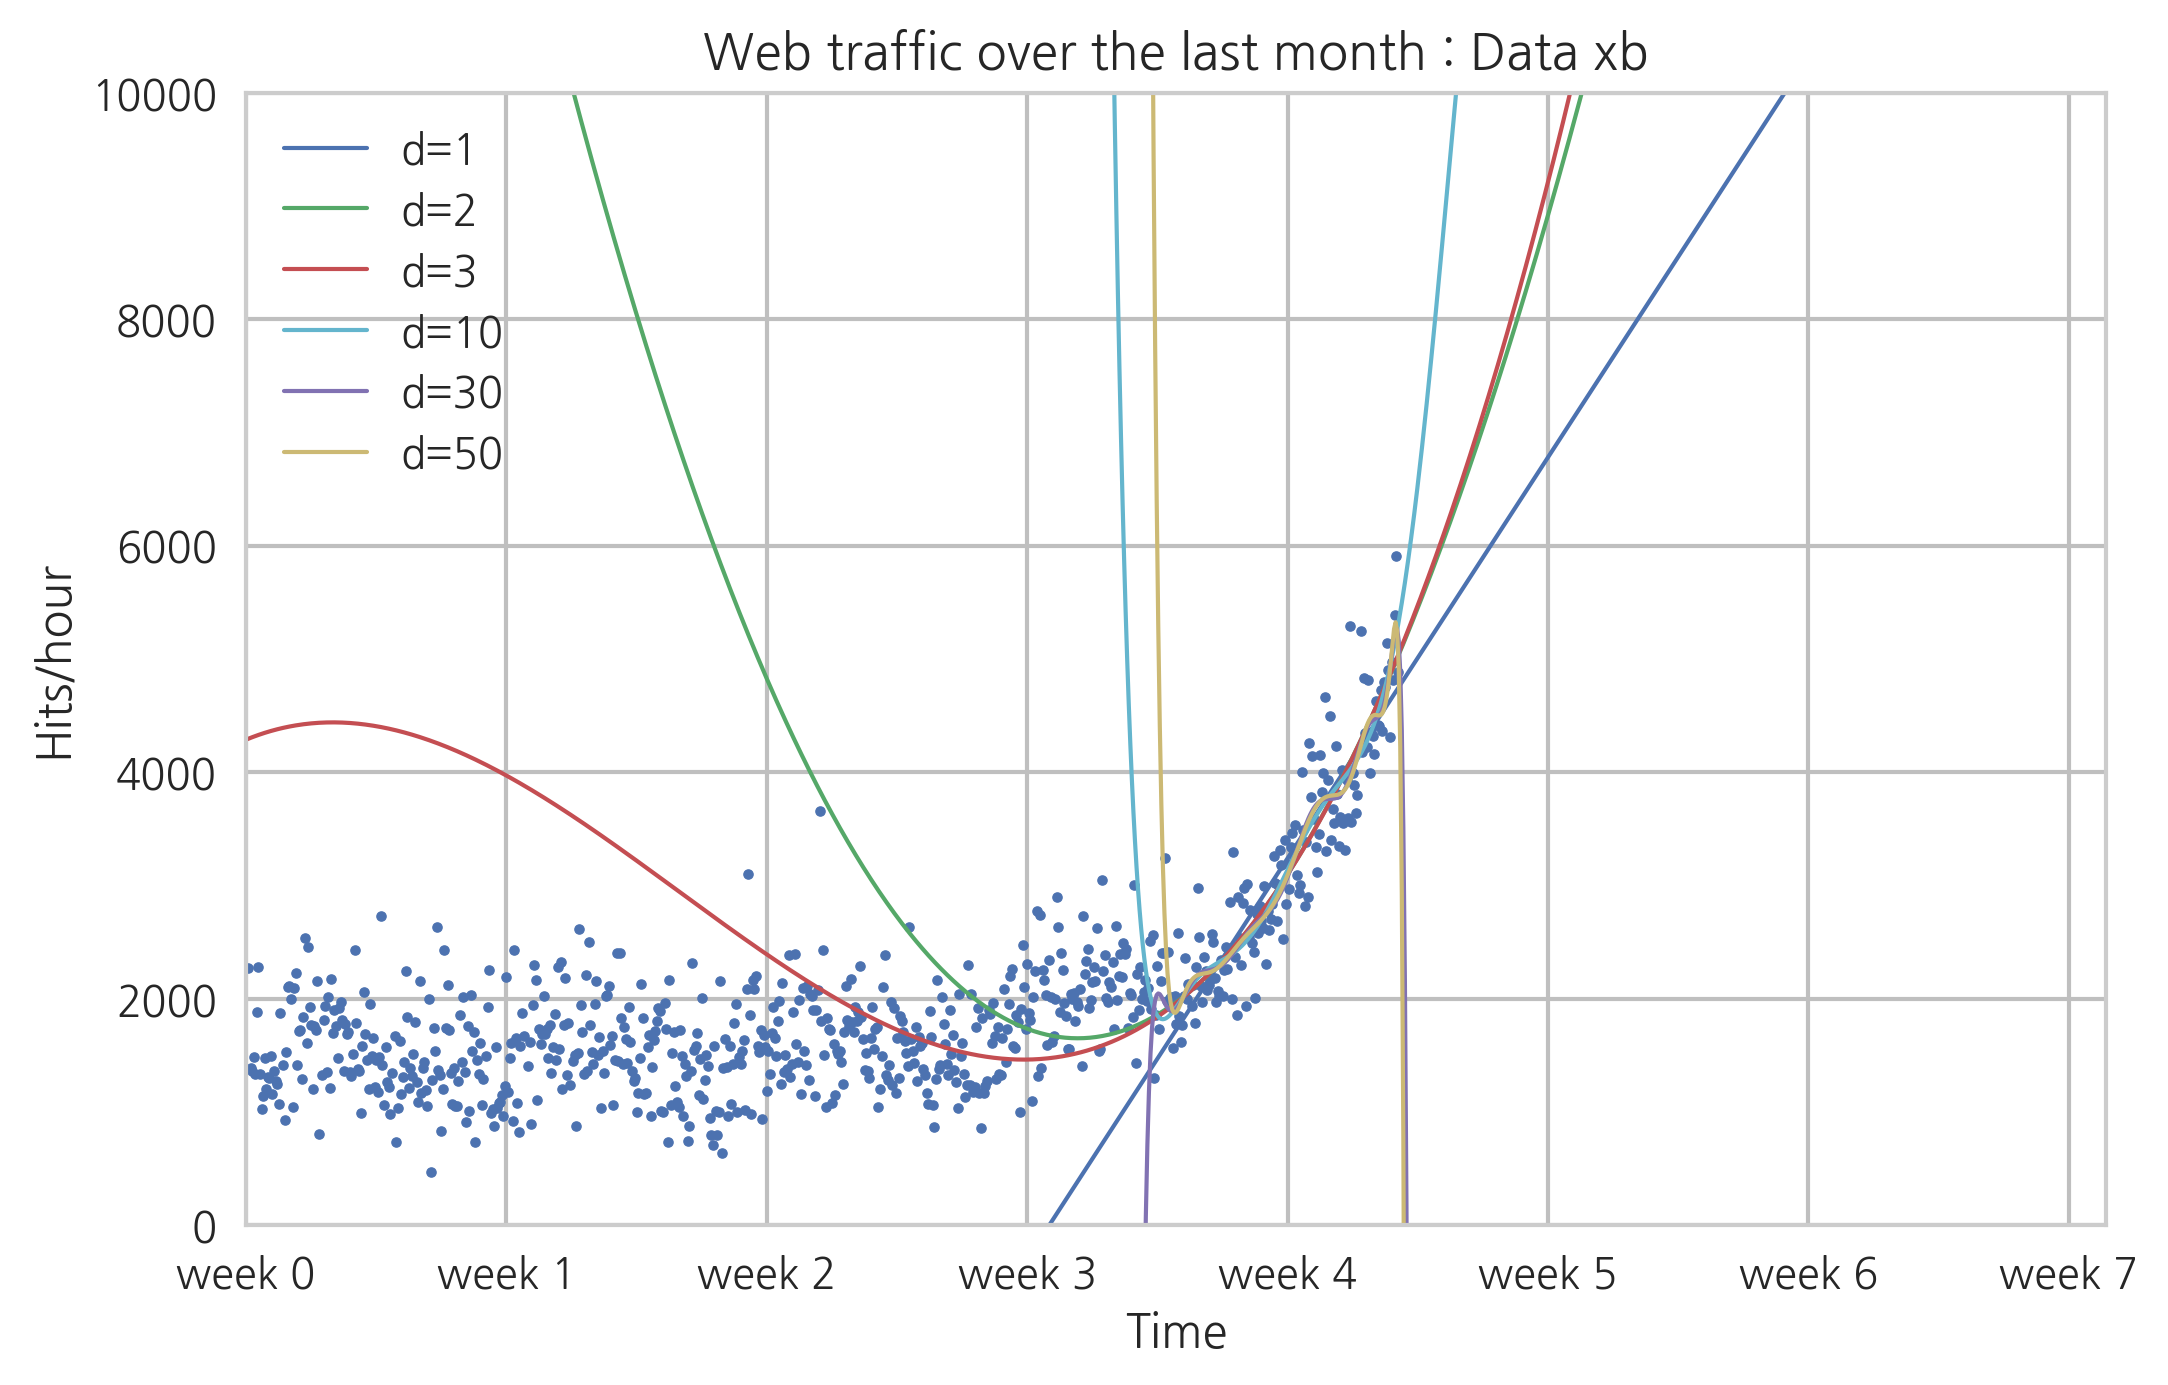

In [22]:
plt.scatter(x1, y1, s=5)
plt.title("Web traffic over the last month : Data xb")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],
           ['week %i' % w for w in range(10)])

fx = sp.linspace(0, 1200, 1200)
nums = [1, 2, 3, 10, 30, 50]
cols = 'bgrcmykw'
f_lst = []
e_lst = []
for i, num in enumerate(nums):
    f = get_polyfunc(xb, yb, num)
    f_lst.append(f)
    e_lst.append(error(f, xb, yb))
    plt.plot(fx, f(fx), linewidth=1, color=cols[i])
    
    
plt.legend(["d={}".format(f.order) for f in f_lst], loc="upper left")
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
plt.xlim(0, 1200)
plt.ylim(0, 10000)
plt.show()    

### Training and testing

- The test errors for the models trained only on the time after inflection point now show a completely different picture:


In [27]:
for n, e in zip(nums, e_lst):
    print("{} shows {}".format(n, e))

1 shows 22143941.107618243
2 shows 19768846.989176348
3 shows 19766452.361026965
10 shows 18949296.483995266
30 shows 18415952.131939888
50 shows 18337354.615208298


### Answering our initial question

- This can be done by subtracting 100,000 from the polynomial, which results in another polynomial, and finding its root. SciPy's optimize module has the function fsolve that achieves this, when providing an initial starting position with parameter x0. As every entry in our input data file corresponds to one hour, and we have 743 of them, we set the starting position to some value after that. Let fbt2 be the winning polynomial of degree 2.


In [28]:
fbt2 = np.poly1d(sp.polyfit(xb, yb, 2))
print("fbt2(x)= \n%s" % fbt2)

fbt2(x)= 
         2
0.07893 x - 84.69 x + 2.437e+04


In [31]:
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))

fbt2(x)-100,000= 
         2
0.07893 x - 84.69 x - 7.563e+04


In [33]:
from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 9.837964


# C2 : Classifying with Real-world Examples

- The general method of classification is to use a set of examples of each class to learn rules that can be applied to new examples. This is one of the most important machine learning modes and is the topic of this chapter. 

### The Iris dataset

- This is the supervised learning or classification problem: given labeled examples, can we design a rule to be later applied to other examples? A more familiar example to modern readers who are not botanists is spam filtering, where the user can mark e-mails as spam, and systems use these as well as the non-spam e-mails to determine whether a new, incoming message is spam or not. 

### Visualization is a good first step

In [34]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.datasets import load_iris

In [35]:
data = load_iris()

In [38]:
type(data)

sklearn.utils.Bunch

In [39]:
print(data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

> Data and Label

In [40]:
features = data.data
feature_names = data.feature_names
target = data.target
target_names = data.target_names

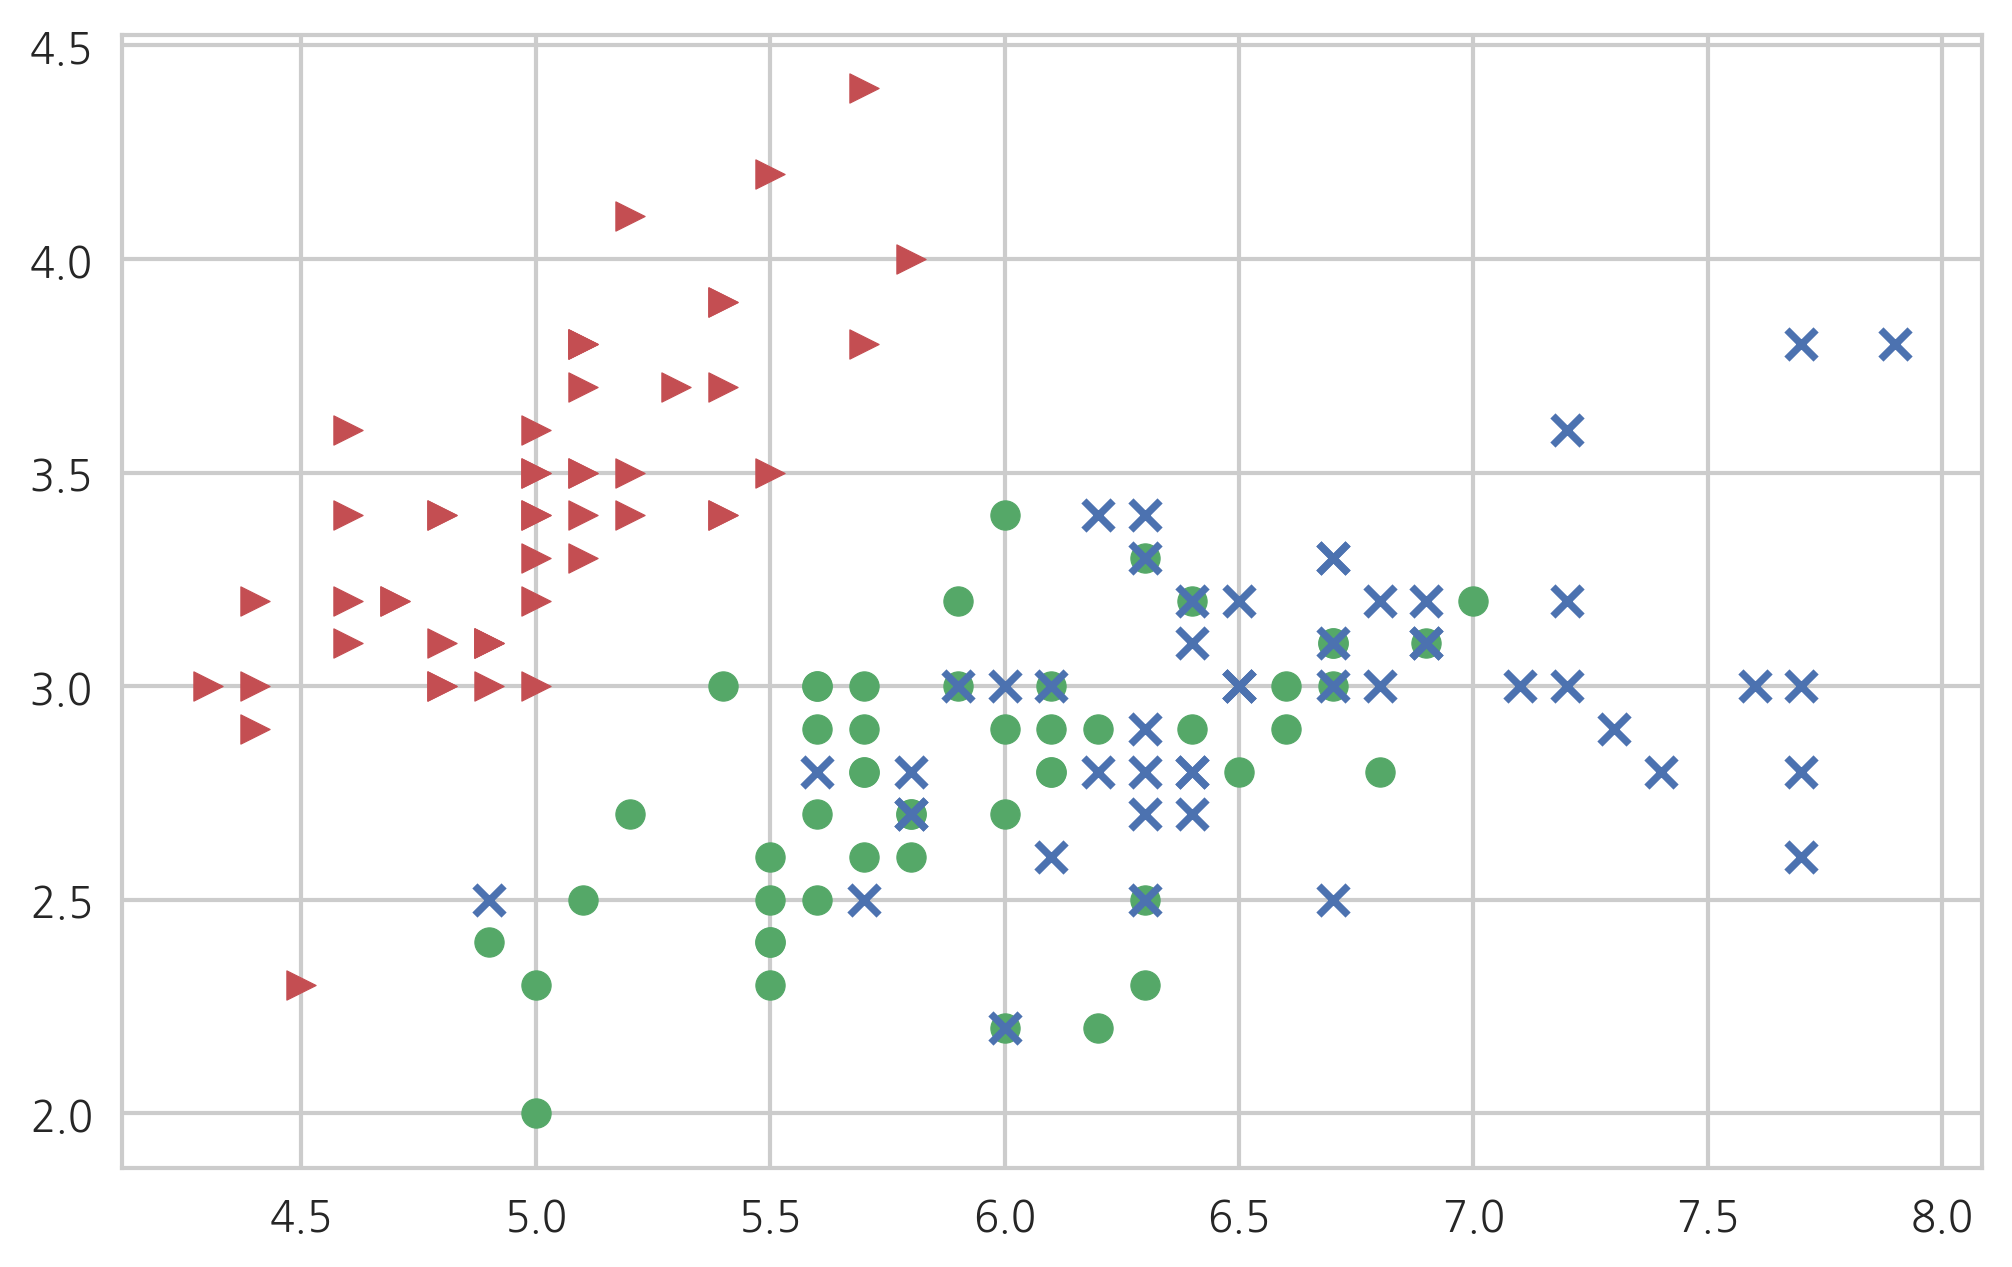

In [41]:
for i in range(3):
    m_lst = '>ox'
    c_lst = 'rgb'
    plt.scatter(features[target == i,0],
               features[target == i, 1],
               marker=m_lst[i],
               c=c_lst[i])

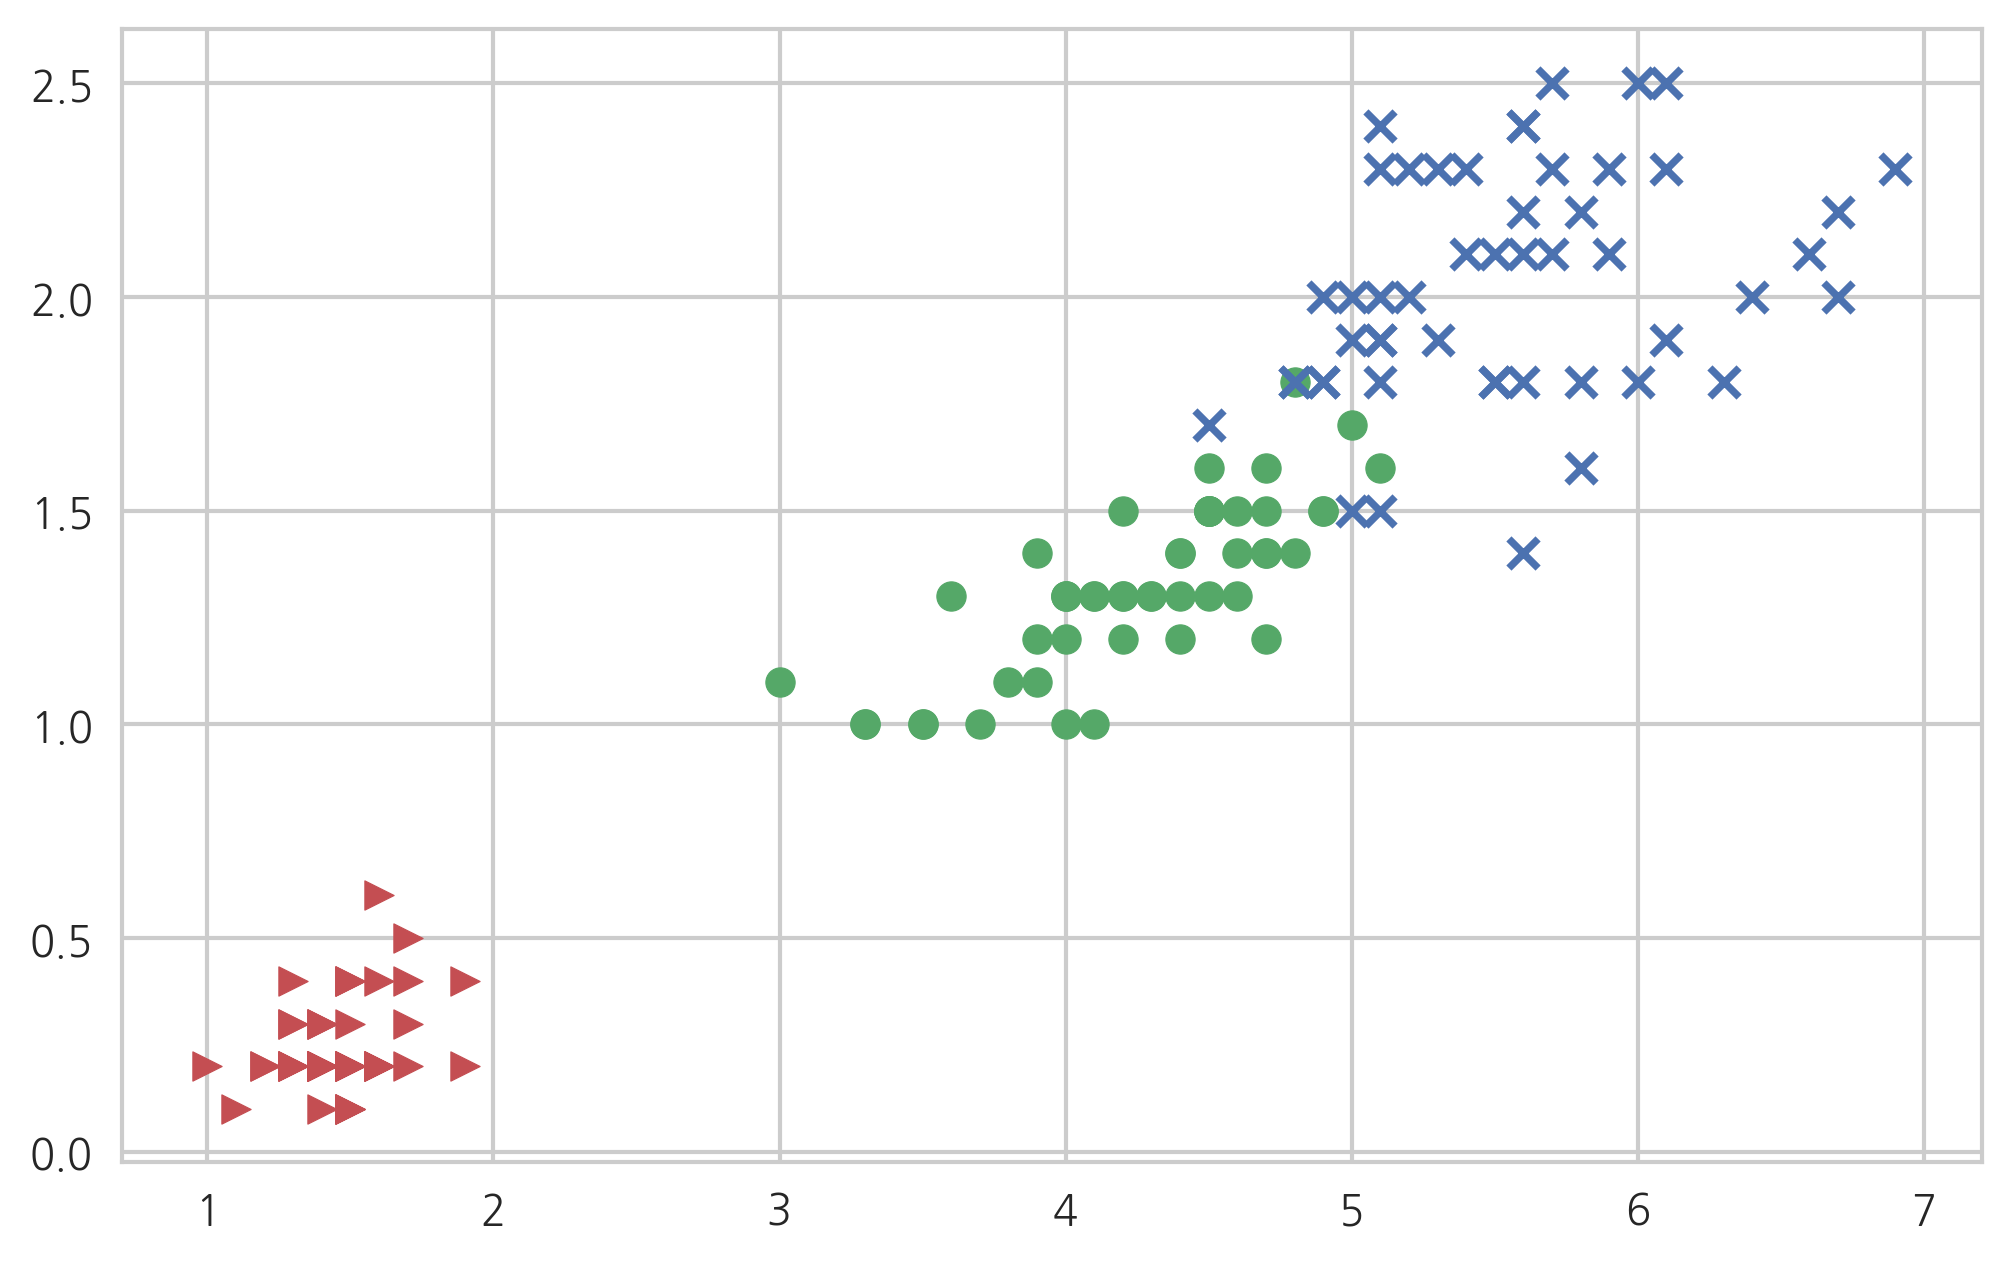

In [42]:
for i in range(3):
    m_lst = '>ox'
    c_lst = 'rgb'
    plt.scatter(features[target == i,2],
               features[target == i, 3],
               marker=m_lst[i],
               c=c_lst[i])

### Building our first classification model

In [45]:
labels = target_names[target] # fancy indexing
plength = features[:, 2]
is_setosa = (labels == 'setosa')

max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()
print('Maximum of setosa: {0}.'.format(max_setosa))
print('Minimum of others: {0}.'.format(min_non_setosa))

Maximum of setosa: 1.9.
Minimum of others: 3.0.


In [46]:
features = features[~is_setosa]
labels = labels[~is_setosa]
is_virginica = (labels == 'virginica')

In [48]:
best_acc = -1.0
for fi in range(features.shape[1]):
    thresh = features[:, fi]
    for t in thresh:
        feature_i = features[:, fi]
        pred = (feature_i > t)
        acc = (pred == is_virginica).mean()
        rev_acc = (pred == ~is_virginica).mean()
        if rev_acc > acc:
            reverse = True
            acc = rev_acc
        else:
            reverse = False
            
        if acc > best_acc:
            best_acc = acc
            best_fi = fi
            best_t = t
            best_reverse  = reverse
        

In [49]:
def is_virginica_test(fi, t, reverse, example):
    """Apply threshold model to a new example"""
    test = example[fi] > t
    if reverse:
        test = not test
    return test

** Dicision Boundary **

## P. 56